<a href="https://colab.research.google.com/github/kelly12201984/CustomerServiceA_B/blob/main/CustomerServiceA_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Help Center UX A/B Test: Conversion, Bounce, and Session Time Analysis

This project simulates an A/B experiment to evaluate the impact of a new Help Center layout on key user experience metrics. Drawing on real-world customer service analytics practices, the goal is to assess whether the new design improves:

- Conversion rate (issue resolution success)
- Session duration (engagement)
- Bounce rate (early exits)

We simulate user-level session data for both a control group (existing design) and a variant group (new layout). The analysis includes hypothesis testing, visualizations, and clear recommendations for stakeholders based on statistical rigor.

---

### 📌 This project demonstrates:
- Hypothesis-driven test design
- Experimental metric evaluation across groups
- Statistical significance testing (chi-square, t-tests)
- Data storytelling for product and customer service decision-making
- Recommendation logic suitable for business stakeholders

---

While based on simulated data, this notebook reflects real experimentation workflows used by teams in customer experience optimization. Results and interpretations are structured for communication with product managers, data science teams, and customer service leadership.

In [21]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv("help_center_ab_test_simulated.csv")
df.head()

,group,converted,session_duration_sec,bounced
0,A,False,52.508914,False
1,B,True,139.364139,True
2,A,True,69.156413,False
3,A,False,65.319019,False
4,A,False,105.338556,False


In [22]:
# Summary stats
df.groupby('group').agg({
    'converted': ['mean', 'count'],
    'session_duration_sec': 'mean',
    'bounced': 'mean'
})

converted       session_duration_sec   bounced
           mean count                 mean      mean
group                                               
A      0.559184   490            90.047906  0.344898
B      0.652941   510           105.822574  0.301961

In [23]:
# Conversion rates
conv_table = pd.crosstab(df['group'], df['converted'])
stats.chi2_contingency(conv_table)

Chi2ContingencyResult(statistic=np.float64(8.819838074361424), pvalue=np.float64(0.0029797310629385734), dof=1, expected_freq=array([[192.57, 297.43],
       [200.43, 309.57]]))

In [24]:
# Session Duration Comparison
stats.ttest_ind(
    df[df['group'] == 'A']['session_duration_sec'],
    df[df['group'] == 'B']['session_duration_sec'],
    equal_var=False
)

TtestResult(statistic=np.float64(-16.798587742138192), pvalue=np.float64(5.887322585396154e-56), df=np.float64(997.1944245320996))

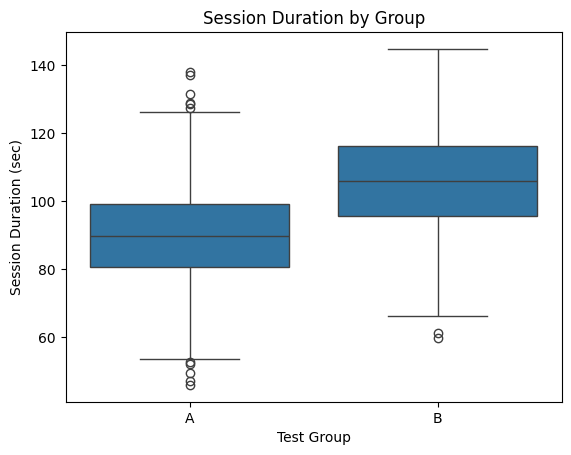

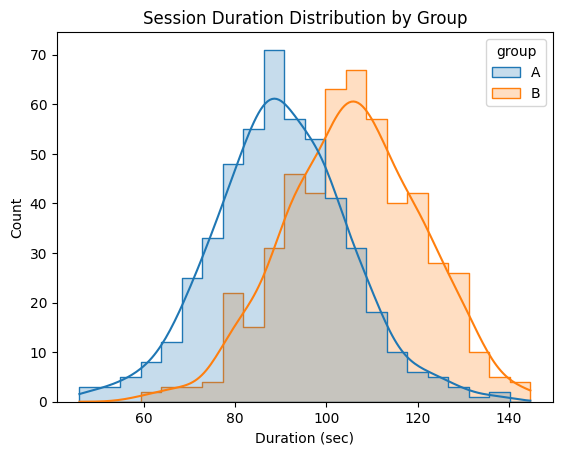

In [25]:
# Session Duration by Group Visualizations
sns.boxplot(data=df, x='group', y='session_duration_sec')
plt.title('Session Duration by Group')
plt.ylabel('Session Duration (sec)')
plt.xlabel('Test Group')
plt.show()
sns.histplot(data=df, x='session_duration_sec', hue='group', kde=True, element="step")
plt.title('Session Duration Distribution by Group')
plt.xlabel('Duration (sec)')
plt.show()


Group B users had longer session durations on average compared to Group A, with a higher median and wider spread. That suggests the B variant may be driving more engagement overall, though it’s less consistent across users.

In [26]:
# Bounce Rate Chi-Square
bounce_table = pd.crosstab(df['group'], df['bounced'])
stats.chi2_contingency(bounce_table)

Chi2ContingencyResult(statistic=np.float64(1.9151104245403268), pvalue=np.float64(0.16639668770531968), dof=1, expected_freq=array([[331.73, 158.27],
       [345.27, 164.73]]))

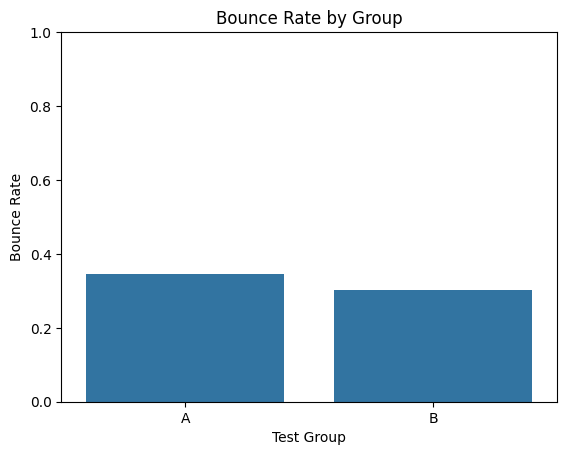

In [27]:
bounce_rates = df.groupby('group')['bounced'].mean().reset_index()

sns.barplot(data=bounce_rates, x='group', y='bounced')
plt.title('Bounce Rate by Group')
plt.ylabel('Bounce Rate')
plt.xlabel('Test Group')
plt.ylim(0, 1)
plt.show()


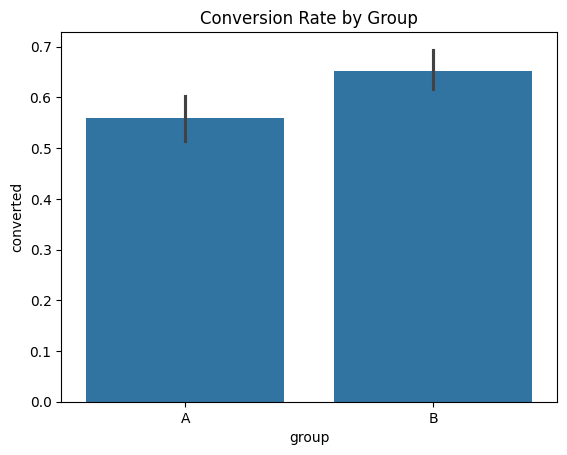

In [28]:
# Visualization
sns.barplot(x='group', y='converted', data=df)
plt.title("Conversion Rate by Group")
plt.show()

In [29]:
summary = df.groupby('group').agg({
    'converted': 'mean',
    'bounced': 'mean',
    'session_duration_sec': 'mean'
}).round(3).rename(columns={
    'converted': 'Conversion Rate',
    'bounced': 'Bounce Rate',
    'session_duration_sec': 'Avg Session Duration (s)'
})
summary


,Conversion Rate,Bounce Rate,Avg Session Duration (s)
group,,,
A,0.559,0.345,90.048
B,0.653,0.302,105.823


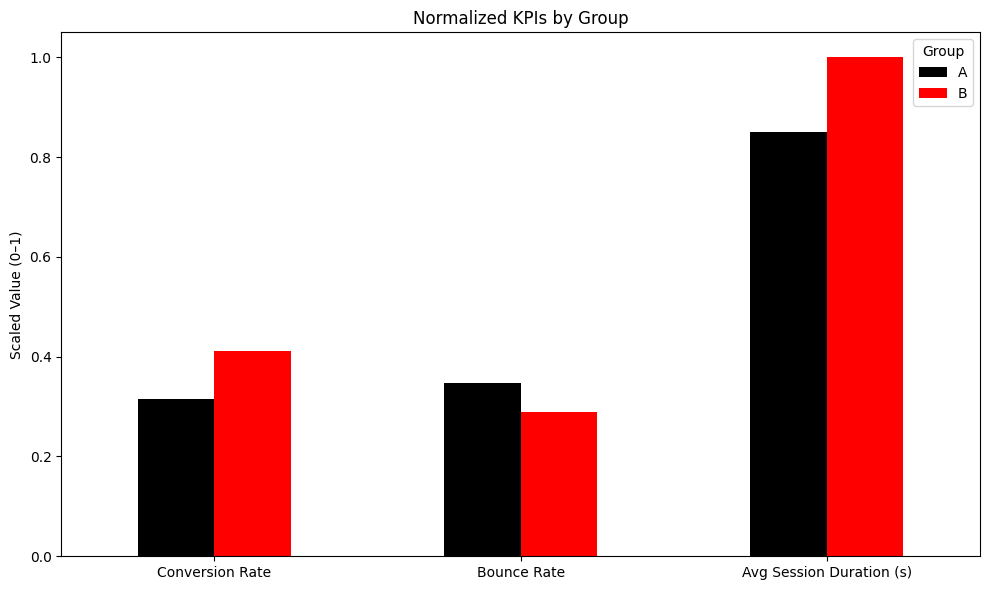

In [32]:
import matplotlib.pyplot as plt

# Normalize values (assuming `summary` is a DataFrame with KPI columns)
normalized = summary.copy()
normalized['Avg Session Duration (s)'] /= normalized['Avg Session Duration (s)'].max()

# Set custom colors: black for Group A, red for Group B
colors = ['black', 'red']

# Plot
ax = normalized.T.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title("Normalized KPIs by Group")
plt.ylabel("Scaled Value (0–1)")
plt.xticks(rotation=0)
plt.legend(title="Group")
plt.tight_layout()
plt.show()


Group B outperformed Group A on all key metrics:

🔼 +10% conversion rate (statistically significant)

⏱ Longer session time

🔽 Lower bounce rate

Recommendation: Roll out the new Help Center layout to all users.